# IBM's Qiskit Global Summer School 2023
## Lab 1 - Qiskit 101:

- This lab shows you how to use Qiskit to implement some of the key concepts you learned in the first 3 lectures of the IBM's Qiskit Global Summer School 2023.

In [1]:
# required import of libraries and modules

# import array to latex converter from
# IBM's Qiskit visualization module
from qiskit.visualization import array_to_latex

# import state-vector and random state-vector from
# IBM's Qiskit quantum information module
from qiskit.quantum_info import Statevector, random_statevector

# import abstract operator and pauli operator from
# IBM's Qiskit quantum information's operators module
from qiskit.quantum_info.operators import Operator, Pauli

# import quantum circuit from IBM's Qiskit
from qiskit import QuantumCircuit

# import hadamard gate and CX/CNOT gate from IBM's Qiskit
from qiskit.circuit.library import HGate, CXGate

# import numpy
import numpy as np

## Vectors and Dirac Notation

In the lectures you learned different ways of representing quantum states, including how to use Bra-Ket (Dirac) notation.

Although Bra-Ket notation cannot be represented exactly in code, we can represent their vector and matrix equivalent with Python.

For example, we can represent $|0\rangle$ using a Python list:

In [2]:
# define the column-vector for |0>
ket0 = [[1],[0]]

And we can use one of IBM's Qiskit visualisation tools to make our vectors nicer to look at:

In [3]:
# convert the column-vector |0> to latex
array_to_latex(ket0)

<IPython.core.display.Latex object>

We can do the same with $\langle0|$:

In [4]:
# define the row-vector for <0|
bra0 = [1, 0]

# convert the row-vector <0| to latex
array_to_latex(bra0)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex. 1 - Create the state-vectors $|1\rangle$ and $\langle1|$ with Python lists. </div>

In [5]:
# put your answer answer here for the column-vector |1>
ket1 = [ [0], [1] ]

# put your answer here for the row-vector <1|
bra1 = [0, 1]

In [6]:
# import the grader for the exercise 1 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex1 

# grade the exercise 1 of the lab 1
grade_lab1_ex1([ket1, bra1])

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Qiskit `Statevector` Class

In the lectures you learned about using state vectors to represent quantum states. You can represent quantum state vectors in code using IBM's Qiskit [`Statevector` class](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html).

IBM's Qiskit `Statevector` class can take different forms of input (e.g. Python list, Numpy array, another state vector) to construct a state vector.

Let's take the `bra0` object we created earlier and convert it to a `Statevector` object:

In [7]:
# create a state-vector for the row-vector <0|
sv_bra0 = Statevector(bra0)

# show the object of the state-vector for the row-vector <0|
sv_bra0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The `Statevector` class has its own `draw()` method:

In [8]:
# draw the state-vector for the row-vector <0| in latex
sv_bra0.draw("latex")

<IPython.core.display.Latex object>

We can create more complex statevectors with multiple qubits like this:

In [9]:
# create a complex state-vector for multiple qubits 
sv_eq = Statevector( [ 1/2, 3/4, 4/5, 6/8 ] )

# draw the complex state-vector created before in latex
sv_eq.draw("latex")

<IPython.core.display.Latex object>

Note that the vector above is not a valid state vector as it is not normalised. 
We can check this with the `is_valid()` method:

In [10]:
# check if the complex state-vector created before
# is valid for a quantum state (i.e., if it is normalised)
sv_eq.is_valid()

False

<div class="alert alert-block alert-success"> Ex. 2 - Create your own valid statevector object using the `Statevector` class. </div>

In [11]:
# create your valid statevector here
sv_valid = Statevector( [ 1/2, 1/2, 1/2, 1/2 ] )

In [12]:
# import the grader for the exercise 2 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex2 

# grade the exercise 2 of the lab 1
grade_lab1_ex2(sv_valid)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## IBM's Qiskit `Operator` Class

The [`Operator` class](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator) is used in IBM's Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

One way we can initialise an IBM's Qiskit `Operator` is by using a Python list, like the one we created earlier:

In [13]:
# create an operator for the row-vector <0|
op_bra0 = Operator(bra0)

# show the object of the operator for the row-vector <0|
op_bra0

Operator([1.+0.j, 0.+0.j],
         input_dims=(), output_dims=(2,))

The Operator class comes with some handy methods for working with operators, for example we can find the tensor product of 2 operators by using the `tensor()` method:

In [14]:
# create an operator for the column-vector |0>
op_ket0 = Operator(ket0)

# apply the tensor product of the operator
# created before to the operator applied to
# the row-vector <0|
op_bra0.tensor(op_ket0)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(), output_dims=(2, 2))

We'll use the `Operator` and `Statevector` classes more in the following exercises.

## Inner & Outer Product

In the lectures you covered the concepts of the inner and outer product. We can explore these concepts in code using Numpy methods `.dot()` (the inner product is a generalised form of the dot product) and `.outer()`.

For example, we can find the inner product $\langle0|0\rangle$ like this:

In [15]:
# compute the inner product between the row-vector <0|
# and the column-vector |0>, as a bra-ket product <0|0>
# note: this operator is also used to check if
#       two pure quantum states overlap (i.e., are equal)
braket = np.dot(op_bra0, op_ket0)

# convert the result of the inner product
# computed before to latex
array_to_latex(braket)

<IPython.core.display.Latex object>

And the outer product $|0\rangle\langle0|$ like this:

In [16]:
# compute the outer product between the column-vector |0>
# and the column-vector <0|, as a ket-bra product |0><0|
ketbra = np.outer(ket0,bra0)

# convert the result of the outer product
# computed before to latex
array_to_latex(ketbra)

<IPython.core.display.Latex object>

Note: The Numpy methods we used above work with IBM's Qiskit Operators as well as regular Python lists.

<div class="alert alert-block alert-success"> Ex. 3 - Use Numpy to find the result of the following inner and outer products:<br>
    <p> &#8226; $\langle1|0\rangle$, $\langle0|1\rangle$, $\langle1|1\rangle$, $|1\rangle\langle0|$, $|0\rangle\langle1|$, and $|1\rangle\langle1|$. </p>
</div>

In [17]:
# definition of the operators for the row-vectors (bra vectors)
# <0| and <1|, and the column-vectors (ket vectors) |0> and |1>
op_bra0 = Operator(bra0)
op_bra1 = Operator(bra1)
op_ket0 = Operator(ket0)
op_ket1 = Operator(ket1)


# definition of the inner products (bra-ket products)

# put your answer for the inner product
# (bra-ket product) <1|0> here
bra1ket0 = np.dot(op_bra1, op_ket0)

# put your answer for the inner product
# (bra-ket product) <0|1> here
bra0ket1 = np.dot(op_bra0, op_ket1)

# put your answer for the inner product
# (bra-ket product) <1|1> here
bra1ket1 = np.dot(op_bra1, op_ket1)


# definition of the outer products (ket-bra products)

# put your answer for the outer product
# (ket-bra product) |1><0| here
ket1bra0 = np.outer(op_ket1, op_bra0)

# put your answer for the outer product
# (ket-bra product) |0><1| here
ket0bra1 = np.outer(op_ket0, op_bra1)

# put your answer for the outer product
# (ket-bra product) |1><1| here
ket1bra1 = np.outer(op_ket1, op_bra1)

In [18]:
# import the grader for the exercise 3 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex3 

# grade the exercise 3 of the lab 1
grade_lab1_ex3( [ bra1ket0, bra0ket1, bra1ket1, ket1bra0, ket0bra1, ket1bra1 ] )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


<div class="alert alert-block alert-success"> 
    <p> Ex. 4 - When the inner product of 2 quantum states is equal to 0, those states are orthogonal. Which of the following quantum states are orthogonal? </p>
    <p>a) $\vert 0\rangle$ and $\vert 1\rangle$ </p>
    <p>b) $\vert 0\rangle$ and $\vert 0\rangle$ </p>
    <p>c) $\vert 1\rangle$ and $\vert 1\rangle$ </p>
</div>

In [19]:
# two quantum states are orthogonal if
# they are completely opposite and
# never overlap with each other
# (i.e., when their inner product is equal to 0)

# <0|1> = <1|0> = 0, the quantum states |0> and |1>
# never overlap with each other and are completely opposite,
# or in other words, they are orthogonal

# add or remove your answer from this list
answer = ["a"]

In [20]:
# import the grader for the exercise 4 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex4 

# grade the exercise 4 of the lab 1
grade_lab1_ex4(answer)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Deterministic operations

As mentioned in the lectures, there are 4 single bit deterministic operations:  
* f1 = constant-0  
* f2 = identity  
* f3 = bit flip / not  
* f4 = constant-1

$$
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

We can create Qiskit Operators for these 4 operations, by passing their matrix representations as arguments to the `Operator` class.

E.g., for constant-0 we can create the corresponding matrix m1 like so:

In [21]:
# create an operator for a single qubit system defined as
# m_1 = [ [1, 1],
#         [0, 0] ], which represents the f1 = constant-0
#                   deterministic operation
m1 = Operator( [ [1, 1], [0, 0] ] )

# convert the operator created before to latex
array_to_latex(m1)

<IPython.core.display.Latex object>

And similarly for m3 (for f3 = bit flip / not):

In [22]:
# create an operator for a single qubit system defined as
# m_3 = [ [0, 1],
#         [1, 0] ], which represents the f3 = bit flip / not
#                   deterministic operation
m3 = Operator( [ [0, 1], [1,0] ] )

# convert the operator created before to latex
array_to_latex(m3)

<IPython.core.display.Latex object>

We can also use builtin Python mutliplication operations (e.g. `@`, `.dot`, or `.matmul`) to check the following equation: $ M|a\rangle = f|a\rangle $.

For example, $ M1|0\rangle = f1|0\rangle $ = 0:

In [23]:
# represent in latex the result of applying
# the operator m1 to the column-vector (ket vector) |0>
array_to_latex(m1@ket0)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex. 5 - Create IBM's Qiskit Operators for m2 and m4.<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Hint: Check out the lectures to find the appropriate matrices). </div>

In [24]:
# create an operator for a single qubit system defined as
# m_2 = [ [1, 0],
#         [0, 1] ], which represents the f2 = identity
#                   deterministic operation
m2 = Operator( [ [1, 0], [0, 1] ] )

# create an operator for a single qubit system defined as
# m_4 = [ [0, 0],
#         [1, 1] ], which represents the f4 = constant-1
#                   deterministic operation
m4 = Operator( [ [0, 0], [1, 1] ] )

In [25]:
# import the grader for the exercise 5 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex5

# grade the exercise 5 of the lab 1
grade_lab1_ex5( [ m2, m4 ] )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Probabilistic operations

A Controlled-NOT (or CNOT) operation is a probabilistic operation you can apply on 2 qubits.

Applying a CNOT on a state (X,Y) involves performing a NOT operation on Y when X is 1, otherwise do nothing.
X is the control bit, Y is the target bit.

We can implement a CNOT gate (and many other quantum gates) using a class from [Qiskit's circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html):

In [26]:
# create a CX/CNOT quantum gate as an operator
cnot = CXGate()

# convert the operator created before to latex
array_to_latex(cnot)

<IPython.core.display.Latex object>

Note: This matrix is different from the one that appeared in the lesson because `CXGate()` takes the right qubit to be the control rather than the left qubit.

## Unitary Operations

An operator is unitary if: $ UU^{\dagger} = \mathbb{1} = U^{\dagger} U$.

We can check if an operator is Unitary using IBM's Qiskit with the `is_unitary()` method:

In [27]:
# check if the operator for a single qubit system defined as
# m_3 = [ [0, 1],
#         [1, 0] ], which represents the f3 = bit flip / not
#                   deterministic operation, is unitary
m3.is_unitary()

True

With small operators like m3 we could probably figure this out easily by ourselves, but with more complex operators it becomes more convenient to use the IBM's Qiskit function:

In [28]:
# create a random operator for multiple qubit system
random = Operator( np.array( 
    [ [  0.50778085 - 0.44607116j, -0.1523741  + 0.14128434j, 
         0.44607116 + 0.50778085j, -0.14128434 - 0.1523741j  ],
      [  0.16855994 + 0.12151822j,  0.55868196 + 0.38038841j,
        -0.12151822 + 0.16855994j, -0.38038841 + 0.55868196j ],
      [  0.50778085 - 0.44607116j, -0.1523741  + 0.14128434j,
        -0.44607116 - 0.50778085j,  0.14128434 + 0.1523741j  ],
      [  0.16855994 + 0.12151822j,  0.55868196 + 0.38038841j,
         0.12151822 - 0.16855994j,  0.38038841-0.55868196j ] ] ) )

# check if the random operator for multiple qubit system is random
random.is_unitary()

True

<div class="alert alert-block alert-success"> Ex. 6 - Create an operator using the `Operator` class that is not unitary. </div>

In [29]:
# create your non-unitary operator here
non_unitary_op = Operator( [ [1, 0], [1, 1] ] )

In [30]:
# import the grader for the exercise 6 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex6

# grade the exercise 6 of the lab 1
grade_lab1_ex6(non_unitary_op)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Qubit Unitary Operations - Pauli Operations

Some of the most common unitary operations in quantum computing are the Pauli operations. IBM's Qiskit `Pauli` classes make it easy to interact with Pauli operators in code:

For example, Pauli X ($\sigma_x$), the bit flip:

In [31]:
# create the Pauli-X (bit flip / not) quantum gate
pauli_x = Pauli("X")

# convert the quantum gate created before to latex
array_to_latex(pauli_x)

<IPython.core.display.Latex object>

For Pauli Y ($\sigma_y$):

In [32]:
# create the Pauli-Y quantum gate
pauli_y = Pauli("Y")

# convert the quantum gate created before to latex
array_to_latex(pauli_y)

<IPython.core.display.Latex object>

For Pauli Z ($\sigma_z$), the phase flip:

In [33]:
# create the Pauli-Z (phase flip) quantum gate
pauli_z = Pauli("Z")

# convert the quantum gate created before to latex
array_to_latex(pauli_z)

<IPython.core.display.Latex object>

We can use the `Operator` class with the `Pauli` class:

In [34]:
# convert the Pauli-X (bit flip / not)
# quantum gate to an operator
op_x = Operator(pauli_x)

# show the Pauli-X (bit flip / not)
# quantum gate converted to an operator
op_x

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Let's use the `Operator` class and Numpy to find the outcome of $\sigma_x|0\rangle$:

In [35]:
# apply the inner product between the Pauli-X (bit flip / not) operator
# the quantum state of the column-vector (ket vector) |0>, resulting to
# a new quantum state of the column-vector (ket vector) |1>
op_new = np.dot(op_x ,ket0)

# convert the resulting new operator to latex
array_to_latex(op_new)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex. 7 - Apply the Pauli-Z operator on $|1\rangle$. </div>

In [36]:
# do your operations here

# convert the Pauli-Z (phase flip)
# quantum gate to an operator
op_z = Operator(pauli_z)

# apply the inner product between the Pauli-Z (phase flip) operator
# the quantum state of the column-vector (ket vector) |1>, resulting to
# a new quantum state of the column-vector (ket vector) -|1>
result = np.dot(op_z ,ket1)

# convert the resulting new operator to latex
array_to_latex(result)

<IPython.core.display.Latex object>

In [37]:
# import the grader for the exercise 7 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex7

# grade the exercise 7 of the lab 1
grade_lab1_ex7(result)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Qubit Unitary Operations - Hadamard


The Hadamard gate is one of the most important unitary operations in quantum computing. We can implement a Hadamard gate (and many other quantum gates) using a class from [IBM's Qiskit circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html):

In [38]:
# create the Hadamard quantum gate
hadamard = HGate()

# convert the quantum gate created before to latex
array_to_latex(hadamard)

<IPython.core.display.Latex object>

You can convert many IBM's Qiskit classes to operators to make use of functions specific to the `Operator` class, such as `is_unitary`.

In [39]:
# convert the Hadamard quantum gate to an operator
op_h = Operator(hadamard)

# show the Hadamard quantum gate
# converted to an operator
print(op_h)

# check if the Hadamard quantum gate
# converted to an operator is unitary
op_h.is_unitary()

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


True

## Quantum Circuits

In the lectures you learned how to create a Quantum Circuit using a CNOT and a Hadamard gate. This circuit creates the Bell State $|\phi^+\rangle$. We can implement this using IBM's Qiskit `QuantumCircuit` class:

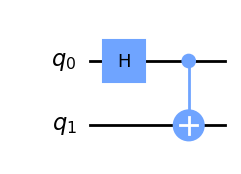

In [40]:
# create a quantum circuit for two qubits
# and to implement a Bell state
bell = QuantumCircuit(2)

# apply a Hadamard gate to
# the 1st qubit of the quantum circuit
bell.h(0)

# apply a CX/CNOT gate to
# the 1st and 2nd qubits of the quantum circuit
bell.cx(0, 1)

# draw the quantum circuit implementing the Bell state
bell.draw(output="mpl")

If we want to check what the matrix representation is of this quantum state we can convert the circuit directly to an operator:

In [41]:
# converting the quantum circuit
# implementing the Bell state to an operator
bell_op = Operator(bell)

# convert the quantum operator representing
# the quantum circuit created before to latex
array_to_latex(bell_op)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex. 8 - The GHZ state is similar to the Bell State but applied to 3 qubits. Create a quantum circuit outputting the GHZ state. </div>

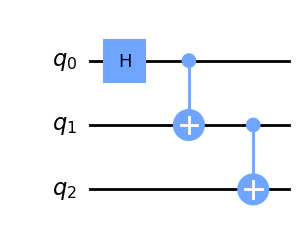

In [42]:
# create a quantum circuit for three qubits
# and to implement a GHZ state
ghz = QuantumCircuit(3)

##############################

# add gates to your quantum circuit here

# apply a Hadamard gate to
# the quantum circuit, on the 1st qubit
ghz.h(0)

# apply a CX/CNOT gate to
# the quantum circuit,
# with control on 1st qubit
# and target on 2nd qubit
ghz.cx(0, 1)

# apply a CX/CNOT gate to
# the quantum circuit,
# with control on 2nd qubit
# and target on 3rd qubit
ghz.cx(1, 2)

##############################

# draw the quantum circuit implementing the GHZ state
ghz.draw(output="mpl")

In [43]:
# import the grader for the exercise 8 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex8

# grade the exercise 8 of the lab 1
grade_lab1_ex8(ghz)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Measuring Quantum states

As explained in the lectures you can find the probability of measurement outcomes by taking the absolute value squared of the entries of a quantum state vector.

For example, when measuring the + state:  

$ |+\rangle = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle $

The probability of measuring 0 or 1 is given by the following:

$ Pr(0) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$  
$ Pr(1) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$

Let's create a $|+\rangle$ using the `Statevector` class:

In [44]:
# create the state-vector for
# the quantum superposition state |+>
plus_state = Statevector.from_label("+")

# convert the state-vector created before to latex
plus_state.draw("latex")

<IPython.core.display.Latex object>

In [45]:
# show the state-vector |+> created before
plus_state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Now we can get the probability of measuring 0 or 1:

In [46]:
# show the probabilities of the possible
# classical outcomes/states resulting 
# from measuring the quantum superposition state |+>
plus_state.probabilities_dict()

{'0': 0.4999999999999999, '1': 0.4999999999999999}

The dictionary object above shows you all the possible measurement outcomes and what the probability is of getting them. The actual act of measuring forces the state to collapse into either the 0 or 1 state:

In [47]:
# run this cell multiple times to show collapsing
# into one state or the other (i.e., 0 or 1)

# for a number of trials equal to 5
for _ in range(5):
    
    # measure the quantum superposition state |+>
    res = plus_state.measure()
    
    # print the result of the measurement of
    # the quantum superposition state |+>
    print(res)

('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))


We can implement the same $|+\rangle$ state with measurement using a quantum circuit:

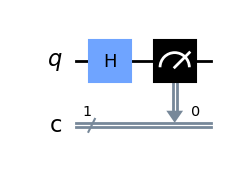

In [48]:
# create a quantum circuit for one qubit and one bit,
# to implement a |+> quantum superposition state
qc = QuantumCircuit(1, 1)

# apply a Hadamard gate to
# the quantum circuit, on the 1st qubit
qc.h(0)

# measure the 1st qubit of the quantum circuit
# to the respective 1st bit of the same
qc.measure(0, 0)

# draw the quantum circuit for one qubit and one bit,
# implementing a |+> quantum superposition state
qc.draw(output="mpl")

If we ran this circuit using a simulator we would get the same results as we did with the statevector class.

In the next example, let's use the `Statevector` class to find the measurement outcomes for a dependent, probabilistic state. We'll find the measurement probilities for the 2-qubit Bell State $|\phi^+\rangle$ :

In [49]:
# create the state-vector for the Bell State |phi^+>
sv_bell = Statevector( [ np.sqrt(1 / 2), 0, 0, np.sqrt(1 / 2) ] )

# draw the state-vector for the Bell State |phi^+>
sv_bell.draw("latex")

<IPython.core.display.Latex object>

In [50]:
sv_bell.probabilities_dict()

{'00': 0.5000000000000001, '11': 0.5000000000000001}

<div class="alert alert-block alert-success"> Ex. 9 - Using the Statevector class find the probabilities for the other 3 states in the Bell Basis: $|\psi^+\rangle$, $|\psi^-\rangle$, $|\phi^-\rangle$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Hint: Check out lesson 2 to refresh your memory on the equations of the Bell states). </div>

In [51]:
# creation of the three quantum states in the Bell basis,
# namely, |psi^+⟩, |psi^-⟩, and |phi^-⟩

# create a statevector for |psi^+⟩ here
sv_psi_plus = Statevector( [ 0, np.sqrt(1 / 2), np.sqrt(1 / 2), 0 ] )

# find the measurement probabilities for |psi^+⟩ here
prob_psi_plus = sv_psi_plus.probabilities_dict()

# create a statevector for |psi^-⟩ here
sv_psi_minus = Statevector( [ 0, np.sqrt(1 / 2), -1 * np.sqrt(1 / 2), 0 ] )

# find the measurement probabilities for |psi^−⟩ here
prob_psi_minus = sv_psi_minus.probabilities_dict()

# create a statevector for |phi^-⟩ here
sv_phi_minus = Statevector( [ np.sqrt(1 / 2), 0, 0, -1 * np.sqrt(1 / 2) ] )

# find the measurement probabilities for |phi^-⟩ here
prob_phi_minus = sv_phi_minus.probabilities_dict()

In [52]:
# import the grader for the exercise 9 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex9

# grade the exercise 9 of the lab 1
grade_lab1_ex9([prob_psi_plus, prob_psi_minus, prob_phi_minus])

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Final Challenge - generate a QFT circuit

[The Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) occurs in many different formats throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation. You'll learn more about this important implementation later on during the Summer School, but for this final challenge of Lab 1 we would like you to use Qiskit to create the following QFT circuit on 2 qubits:

![](resources/quantum-fourier-transform.png)

<div class="alert alert-block alert-success"> Ex. 10 - Create a two-qubit QFT circuit using IBM's Qiskit. </div>

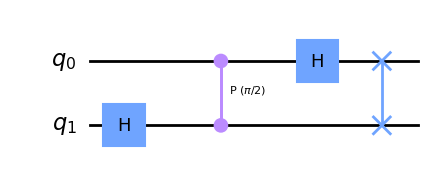

In [53]:
# create a quantum circuit for two qubits,
# to implement a quantum fourier transform
qft = QuantumCircuit(2)

##############################

# add gates to your quantum circuit here

# apply an Hadamard gate to
# the quantum circuit, on the 2nd qubit
qft.h(1)

# apply a Controlled-Phase (CP) gate to
# the quantum circuit acccording to
# a theta angle, with control on
# the 1st qubit and target on the 2nd qubit
qft.cp( np.pi/2, 0, 1 )

# apply an Hadamard gate to
# the quantum circuit, on the 1st qubit
qft.h(0)

# apply a SWAP gate to
# the quantum circuit,
# between the 1st qubit
# and the 2nd qubit
qft.swap(0, 1)

##############################

# draw the quantum circuit for twp qubits,
# implementing a quntum fourier transform
qft.draw(output="mpl")

In [54]:
# import the grader for the exercise 10 of the lab 1
from qc_grader.challenges.qgss_2023 import grade_lab1_ex10

# grade the exercise 10 of the lab 1
grade_lab1_ex10(qft)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


To see the matrix that describes the action of this circuit, we can plug the circuit into the `Operator` function like this:

In [55]:
# create an operator U from the quantum circuit of
# the quantum fourier transform created before
U = Operator(qft)

# convert the quantum operator U representing
# the quantum circuit created before to latex
array_to_latex(U)

<IPython.core.display.Latex object>

In [56]:
import qiskit.tools.jupyter
%qiskit_version_table

Congratulations! You finished Lab 1 of the Qiskit Global Summer School 2023! 🎉 🎉 🎉

Made with ❤ by Rúben André Barreiro (and adapted from IBM Quantum).